In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


#breast-cancer-wisconsin.data

In [3]:
# 1.获取数据
names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
         'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
         'Normal Nucleoli', 'Mitoses', 'Class']

data = pd.read_csv(r"D:\黑马课程\人工智能V3.0（尊享无忧）\00 课程资料\4.阶段四机器学习\数据集\data\breast-cancer-wisconsin.data", names=names)
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
data.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [6]:
# 2.基本数据处理
# 2.1 缺失值处理
data = data.replace(to_replace="?", value=np.NaN)
data = data.dropna()
# 2.2 确定特征值,目标值
x = data.iloc[:, 1:10]
x.head()
y = data["Class"]
y.head()
# 2.3 分割数据
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22)

In [7]:
# 3.特征工程(标准化)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)


In [8]:
# 4.机器学习(逻辑回归)
estimator = LogisticRegression()
estimator.fit(x_train, y_train)


LogisticRegression()

In [9]:
# 5.模型评估
y_predict = estimator.predict(x_test)
estimator.score(x_test, y_test)

0.9766081871345029

In [10]:
### 电信客户流失


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
churn = pd.read_csv(r"D:\黑马课程\人工智能V3.0（尊享无忧）\00 课程资料\4.阶段四机器学习\数据集\data\churn.csv")
churn

C:\Users\17634\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Churn,gender,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges
0,No,Female,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85
1,No,Male,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50
2,Yes,Male,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15
3,No,Male,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75
4,Yes,Female,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Male,1,1,1,1,0,1,1,0,1,0,0,0,84.80,1990.50
7039,No,Female,1,1,1,0,1,1,1,0,1,0,1,0,103.20,7362.90
7040,No,Female,1,1,0,1,0,0,0,1,0,0,0,1,29.60,346.45
7041,Yes,Male,1,0,1,0,1,0,0,1,0,0,0,0,74.40,306.60


In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Partner_att        7043 non-null   int64  
 3   Dependents_att     7043 non-null   int64  
 4   landline           7043 non-null   int64  
 5   internet_att       7043 non-null   int64  
 6   internet_other     7043 non-null   int64  
 7   StreamingTV        7043 non-null   int64  
 8   StreamingMovies    7043 non-null   int64  
 9   Contract_Month     7043 non-null   int64  
 10  Contract_1YR       7043 non-null   int64  
 11  PaymentBank        7043 non-null   int64  
 12  PaymentCreditcard  7043 non-null   int64  
 13  PaymentElectronic  7043 non-null   int64  
 14  MonthlyCharges     7043 non-null   float64
 15  TotalCharges       7043 non-null   float64
dtypes: float64(2), int64(12)

In [13]:
churn=pd.get_dummies(churn)
churn.head()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,gender_Female,gender_Male
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,1,0,1,0
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,1,0,0,1
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,0,1,0,1
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,1,0,0,1
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,0,1,1,0


In [14]:
churn.drop(['Churn_No','gender_Male'],axis=1,inplace=True)
#变量大小写不规则，统一变成小写
churn.columns=churn.columns.str.lower()
churn.head()

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,churn_yes,gender_female
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,0,1
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,1,0
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,0,0
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,1,1


In [15]:
churn=churn.rename(columns={'churn_yes':'flag'})
#二分类模型，分析flag 1和0的占比
churn.flag.value_counts()

0    5174
1    1869
Name: flag, dtype: int64

<AxesSubplot:xlabel='count', ylabel='contract_month'>

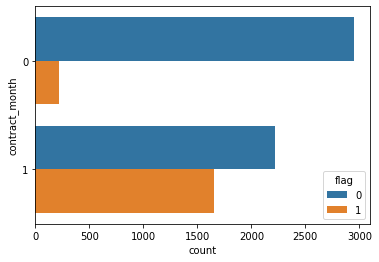

In [16]:
sns.countplot(y='contract_month',hue='flag',data=churn)


In [17]:
# 确定目标值和特征值
y=churn['flag']
x=churn[['contract_month','internet_other','streamingtv']]

#调用sklearn模块，随机抽取训练集与测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
#使用sklearn
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr.fit(x_train,y_train)

y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
import sklearn.metrics as metrics
metrics.accuracy_score(y_train,y_pred_train)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_test)

0.7006333927971842

In [5]:
from sklearn.feature_extraction import DictVectorizer

def dict_demo(sparse=True):
    """
    对字典类型的数据进行特征抽取
    :return: None
    """
    data = [{'city': '北京','temperature':100}, {'city': '上海','temperature':60}, {'city': '深圳','temperature':30}]
    # 1、实例化一个转换器类
    transfer = DictVectorizer(sparse=sparse)
    # 2、调用fit_transform
    data = transfer.fit_transform(data)
    print("返回的结果:\n", data)
    # 打印特征名字
    print("特征名字：\n", transfer.get_feature_names_out())

    return None
dict_demo(False)

返回的结果:
 [[  0.   1.   0. 100.]
 [  1.   0.   0.  60.]
 [  0.   0.   1.  30.]]
特征名字：
 ['city=上海' 'city=北京' 'city=深圳' 'temperature']


In [6]:
dict_demo()

返回的结果:
   (0, 1)	1.0
  (0, 3)	100.0
  (1, 0)	1.0
  (1, 3)	60.0
  (2, 2)	1.0
  (2, 3)	30.0
特征名字：
 ['city=上海' 'city=北京' 'city=深圳' 'temperature']


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

def text_count_demo():
    """
    对文本进行特征抽取，countvetorizer
    :return: None
    """
    data = ["life is short,i like like python", "life is too long,i dislike python"]
    # 1、实例化一个转换器类
    # transfer = CountVectorizer(sparse=False) # 注意,没有sparse这个参数
    transfer = CountVectorizer()
    # 2、调用fit_transform
    data = transfer.fit_transform(data)
    print("文本特征抽取的结果：\n", data.toarray())
    print("返回特征名字：\n", transfer.get_feature_names_out())

text_count_demo()

文本特征抽取的结果：
 [[0 1 1 2 0 1 1 0]
 [1 1 1 0 1 1 0 1]]
返回特征名字：
 ['dislike' 'is' 'life' 'like' 'long' 'python' 'short' 'too']


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import jieba

def cut_word(text):
    """
    对中文进行分词
    "我爱北京天安门"————>"我 爱 北京 天安门"
    :param text:
    :return: text
    """
    # 用结巴对中文字符串进行分词
    text = " ".join(list(jieba.cut(text)))

    return text

def text_chinese_count_demo2():
    """
    对中文进行特征抽取
    :return: None
    """
    data = ["一种还是一种今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。",
            "我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
            "如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]
    # 将原始数据转换成分好词的形式
    text_list = []
    for sent in data:
        text_list.append(cut_word(sent))
    print(text_list)

    # 1、实例化一个转换器类
    # transfer = CountVectorizer(sparse=False)
    transfer = CountVectorizer()
    # 2、调用fit_transform
    data = transfer.fit_transform(text_list)
    print("文本特征抽取的结果：\n", data.toarray())
    print("返回特征名字：\n", transfer.get_feature_names_out())

text_chinese_count_demo2()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\17634\AppData\Local\Temp\jieba.cache
Loading model cost 0.832 seconds.
Prefix dict has been built successfully.


['一种 还是 一种 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。', '我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。', '如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。']
文本特征抽取的结果：
 [[2 0 1 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 0 0 1 1 0 0 1
  0]
 [0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 3 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0
  1]
 [1 1 0 0 4 3 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 2 1 0 0 1 0 0
  0]]
返回特征名字：
 ['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '星系' '晚上' '某样' '残酷' '每个'
 '看到' '真正' '秘密' '绝对' '美好' '联系' '过去' '还是' '这样']


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import jieba

def text_chinese_tfidf_demo():
    """
    对中文进行特征抽取
    :return: None
    """
    data = ["一种还是一种今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。",
            "我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。",
            "如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。"]
    # 将原始数据转换成分好词的形式
    text_list = []
    for sent in data:
        text_list.append(cut_word(sent))
    print(text_list)

    # 1、实例化一个转换器类
    # transfer = CountVectorizer(sparse=False)
    transfer = TfidfVectorizer(stop_words=['一种', '不会', '不要'])
    # 2、调用fit_transform
    data = transfer.fit_transform(text_list)
    print("文本特征抽取的结果：\n", data.toarray())
    print("返回特征名字：\n", transfer.get_feature_names_out())

text_chinese_tfidf_demo()

['一种 还是 一种 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。', '我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。', '如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。']
文本特征抽取的结果：
 [[0.         0.         0.         0.43643578 0.         0.
  0.         0.         0.         0.21821789 0.         0.21821789
  0.         0.         0.         0.         0.21821789 0.21821789
  0.         0.43643578 0.         0.21821789 0.         0.43643578
  0.21821789 0.         0.         0.         0.21821789 0.21821789
  0.         0.         0.21821789 0.        ]
 [0.2410822  0.         0.         0.         0.2410822  0.2410822
  0.2410822  0.         0.         0.         0.         0.
  0.         0.         0.2410822  0.55004769 0.         0.
  0.         0.         0.2410822  0.         0.         0.
  0.         0.48216441 0.         0.         0.         0.
  0.         0.2410822  0.         0.2410822 